First solve the problem and compute the solution by one of the extremal relations.

True
Optimization terminated successfully.


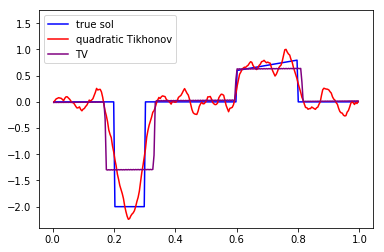

In [1]:
%matplotlib inline

import numpy as np
import scipy.linalg
import scipy.optimize
import matplotlib.pyplot as plt

delta =0.05;
alpha = 5e-3;
beta = 5e-3;

n = 250
x = np.arange(1,n+1) / (n+1)
y = x

# set up matrix describing forward problem
XX , YY = np.meshgrid(x,y)
K = np.minimum(XX * (1-YY),YY*(1-XX))

# exact solution
t1=np.rint(0.2*n).astype(int)
t2=np.rint(0.3*n).astype(int)
t3=np.rint(0.6*n).astype(int)
t4=np.rint(0.8*n).astype(int)

fdag = np.zeros((n,))
fdag[t1:t2] = -2
fdag[t3:t4] = t3/n+ np.arange(t4-t3)/n

# exact data
gdag = K.dot(fdag)

# noise data
gdelta = gdag + delta* np.random.randn(n)


ftik = scipy.linalg.solve(K.transpose().dot(K) + alpha*np.eye(n) , K.transpose().dot(gdelta) )

ftv = ftik
# INSERT YOUR CODE HERE !!!
# Use the function scipy.optimize.minimize to solve the dual problem

# setup dual problem for minimization
div=np.zeros((n,n-2))
div[0:n-2,:]+=np.diag(np.ones(n-2))
div[2:n,:]-=np.diag(np.ones(n-2))
div=(n-1)/2*div

A=K.transpose().dot(K) + alpha*np.eye(n)
func = lambda p: (div@p+K.transpose()@gdelta) @ (np.linalg.solve(A,(div@p+K.transpose()@gdelta)))


C = np.reshape(np.array([ [-np.eye(n-2)] , [np.eye(n-2)] ]),[2*(n-2),n-2])
bineq = (beta)*np.ones(2*(n-2))
cons = ({'type':'ineq', 'fun': lambda p: C@p+bineq})

init=np.zeros(n-2)

sol=scipy.optimize.minimize(func,x0=init,constraints=cons,options={'maxiter': 10000})
print(sol.success)
print(sol.message)

#compute solution from dual solution by extremal relations
ftv=np.linalg.solve(A,div@sol.x)+ftik

    
plt.plot(x,fdag,label="true sol", color="blue")
plt.plot(x,ftik,label="quadratic Tikhonov", color="red")
plt.plot(x,ftv,label="TV", color="purple")
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax*1.5)
plt.legend()
plt.show()

Note that the TV-solution (up to discretization errors) is mostly constant, as predicted by the second extremal relation. We could predict the set of points where $\nabla f \neq 0$ in advance py looking at the solution $p$ to the dual problem. The plot below shows us qualitatively that $f$ will jump 4 times (down-up-up-down) and where the jumps are located ($\approx .18$, $\approx .3$, $\approx .6$, $\approx .85$) but it does not tell us how large the jumps will be. Note that in principle it is possible that $p(x)=\beta$ (or $-\beta$) not just for a single point $x$ but for a whole interval, in which case we would know that $f$ would be increasing (or decreasing) on the whole interval.

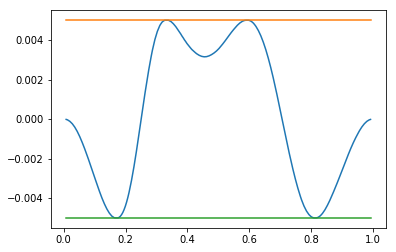

In [6]:
plt.plot(x[1:-1],sol.x)
plt.plot(x[1:-1],(beta)*np.ones(n-2))
plt.plot(x[1:-1],-(beta)*np.ones(n-2))
plt.show()